In [1]:
# Load project functions
import crypto_monetary_base as cmb

In [2]:
import pandas as pd
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [3]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

AttributeError: module 'cgi' has no attribute 'escape'

Software versions
Python 3.9.1 64bit [GCC 5.4.0 20160609]
IPython 7.19.0
OS Linux 5.8.0 0.bpo.2 amd64 x86_64 with glibc2.28
pandas 1.2.0
matplotlib 3.3.3
seaborn 0.11.1
Sun Jan 10 13:32:53 2021 EST

## Supply Curve Calculation

In [4]:
COIN_SYMBOL = 'DASH'

In [5]:
def dash_block_supply_curve():
    out = [
        # Block num,
        # Total supply,
    ]
    inflation_change_blocks=210240
    inflation_change_frac=(13/14)
    y = 4.5 * 1e6
    block = 0
    while True:
        block += 1
        num_changes = int(
            (block - 1) / inflation_change_blocks
        )
        if num_changes > 128:
            break
        block_reward = 5 * (
            inflation_change_frac ** num_changes
        )
        if (block - 1) % inflation_change_blocks == 0:
            print(
                f'Inflation change #{num_changes}, '
                f'block reward = {block_reward}'
            )
        y += block_reward
        out.append([block, y])

    return out

In [6]:
start_date = datetime.date(2014, 7, 19)
block_time = datetime.timedelta(seconds=60 * 2.625)

block_supply = dash_block_supply_curve()

supply = cmb.datetime_supply_curve(
    start_date=start_date,
    block_time=block_time,
    block_supply=block_supply,
)

Inflation change #0, block reward = 5.0
Inflation change #1, block reward = 4.642857142857143
Inflation change #2, block reward = 4.311224489795919
Inflation change #3, block reward = 4.003279883381924
Inflation change #4, block reward = 3.7173313202832157
Inflation change #5, block reward = 3.4518076545487
Inflation change #6, block reward = 3.2052499649380795
Inflation change #7, block reward = 2.9763035388710737
Inflation change #8, block reward = 2.763710428951711
Inflation change #9, block reward = 2.5663025411694464
Inflation change #10, block reward = 2.3829952168002
Inflation change #11, block reward = 2.2127812727430434
Inflation change #12, block reward = 2.0547254675471116
Inflation change #13, block reward = 1.907959362722318
Inflation change #14, block reward = 1.7716765510992951
Inflation change #15, block reward = 1.6451282260207742
Inflation change #16, block reward = 1.5276190670192904
Inflation change #17, block reward = 1.4185034193750554
Inflation change #18, block 

In [7]:
display(supply.head())
display(supply.tail())

,block,total_supply,total_supply_pct,date
0,1,4500005.0,23.418300,2014-07-19 00:00:00.000
1,2,4500010.0,23.418326,2014-07-19 00:02:37.500
2,3,4500015.0,23.418353,2014-07-19 00:05:15.000
3,4,4500020.0,23.418379,2014-07-19 00:07:52.500
4,5,4500025.0,23.418405,2014-07-19 00:10:30.000


,block,total_supply,total_supply_pct,date
27120955,27120956,1.921576e+07,100.0,2149-11-27 05:46:52.500
27120956,27120957,1.921576e+07,100.0,2149-11-27 05:49:30.000
27120957,27120958,1.921576e+07,100.0,2149-11-27 05:52:07.500
27120958,27120959,1.921576e+07,100.0,2149-11-27 05:54:45.000
27120959,27120960,1.921576e+07,100.0,2149-11-27 05:57:22.500


<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

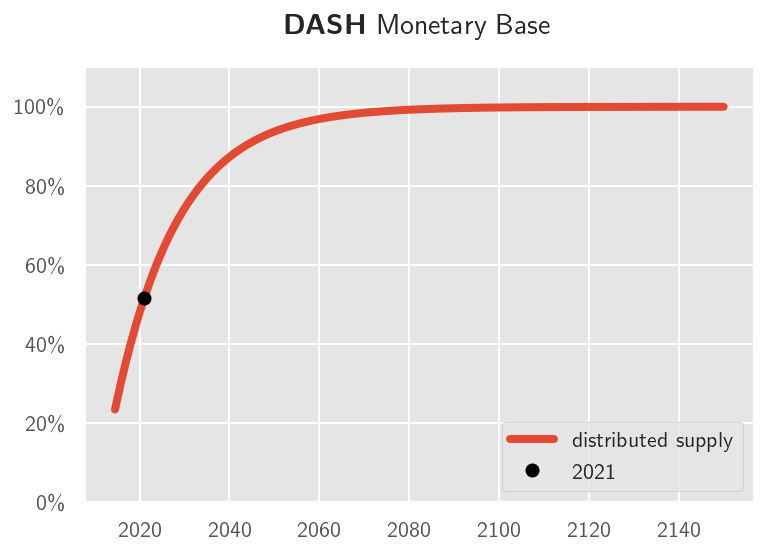

In [8]:
cmb.plot_supply_curve(
    supply,
    'DASH',
    ylim=(0, 110),
);

## Standardize Time Series

In [9]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 7064 lines to file ../output-data/DASH_weekly.csv


,coin,block,total_supply,total_supply_pct,date
0,DASH,1,4500005.0,23.418300,2014-07-01
1,DASH,1099,4505495.0,23.446871,2014-07-01
2,DASH,4939,4524695.0,23.546789,2014-07-01
3,DASH,8779,4543895.0,23.646707,2014-08-01
4,DASH,12619,4563095.0,23.746625,2014-08-01


,coin,block,total_supply,total_supply_pct,date
7059,DASH,27103819,1.921576e+07,99.999966,2149-10-01
7060,DASH,27107659,1.921576e+07,99.999974,2149-11-01
7061,DASH,27111499,1.921576e+07,99.999981,2149-11-01
7062,DASH,27115339,1.921576e+07,99.999989,2149-11-01
7063,DASH,27119179,1.921576e+07,99.999996,2149-11-01


In [10]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 1625 lines to file ../output-data/DASH_monthly.csv


,coin,block,total_supply,total_supply_pct,date
0,DASH,1,4500005.0,23.418300,2014-07-01
1,DASH,7133,4535665.0,23.603877,2014-08-01
2,DASH,24139,4620695.0,24.046379,2014-09-01
3,DASH,40596,4702980.0,24.474595,2014-10-01
4,DASH,57601,4788005.0,24.917070,2014-11-01


,coin,block,total_supply,total_supply_pct,date
1620,DASH,27039087,1.921573e+07,99.999838,2149-07-01
1621,DASH,27056093,1.921574e+07,99.999872,2149-08-01
1622,DASH,27073099,1.921574e+07,99.999905,2149-09-01
1623,DASH,27089556,1.921575e+07,99.999938,2149-10-01
1624,DASH,27106561,1.921576e+07,99.999972,2149-11-01


In [11]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 136 lines to file ../output-data/DASH_yearly.csv


,coin,block,total_supply,total_supply_pct,date
0,DASH,1,4.500005e+06,23.418300,2014-07-01
1,DASH,91064,4.955320e+06,25.787787,2015-01-01
2,DASH,291293,5.927517e+06,30.847163,2016-01-01
3,DASH,492070,6.835955e+06,35.574726,2017-01-01
4,DASH,692299,7.680224e+06,39.968355,2018-01-01


,coin,block,total_supply,total_supply_pct,date
131,DASH,26138333,1.921533e+07,99.997761,2145-01-01
132,DASH,26338561,1.921543e+07,99.998281,2146-01-01
133,DASH,26538790,1.921553e+07,99.998767,2147-01-01
134,DASH,26739019,1.921561e+07,99.999219,2148-01-01
135,DASH,26939796,1.921569e+07,99.999642,2149-01-01
